In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import yaml
plt.style.use('fivethirtyeight')
pd.set_option('display.max_columns',500)
color_pal = plt.rcParams["axes.prop_cycle"].by_key()["color"]

from fredapi import Fred
fred_key ='9fc528c3306b00132c947d501cf40278'

In [2]:
secret_key = yaml.load(open('api_key.yml'),Loader=yaml.FullLoader)
api_key = secret_key['api_key']

In [3]:
#1. Create the Fred Object

In [4]:
fred = Fred(api_key=fred_key)

In [5]:
#2. Search for economic data

In [6]:
fred.search('S&P', order_by='popularity')

,id,realtime_start,realtime_end,title,observation_start,observation_end,frequency,frequency_short,units,units_short,seasonal_adjustment,seasonal_adjustment_short,last_updated,popularity,notes
series id,,,,,,,,,,,,,,,
BAMLH0A0HYM2,BAMLH0A0HYM2,2025-06-03,2025-06-03,ICE BofA US High Yield Index Option-Adjusted S...,1996-12-31,2025-06-02,"Daily, Close",D,Percent,%,Not Seasonally Adjusted,NSA,2025-06-03 08:32:12-05:00,92,The ICE BofA Option-Adjusted Spreads (OASs) ar...
CSUSHPINSA,CSUSHPINSA,2025-06-03,2025-06-03,S&P CoreLogic Case-Shiller U.S. National Home ...,1987-01-01,2025-03-01,Monthly,M,Index Jan 2000=100,Index Jan 2000=100,Not Seasonally Adjusted,NSA,2025-05-27 08:12:48-05:00,88,"For more information regarding the index, plea..."
SP500,SP500,2025-06-03,2025-06-03,S&P 500,2015-06-04,2025-06-03,"Daily, Close",D,Index,Index,Not Seasonally Adjusted,NSA,2025-06-03 19:11:45-05:00,83,The observations for the S&P 500 represent the...
BAMLH0A0HYM2EY,BAMLH0A0HYM2EY,2025-06-03,2025-06-03,ICE BofA US High Yield Index Effective Yield,1996-12-31,2025-06-02,"Daily, Close",D,Percent,%,Not Seasonally Adjusted,NSA,2025-06-03 08:32:15-05:00,82,This data represents the effective yield of th...
BAMLC0A0CM,BAMLC0A0CM,2025-06-03,2025-06-03,ICE BofA US Corporate Index Option-Adjusted Sp...,1996-12-31,2025-06-02,"Daily, Close",D,Percent,%,Not Seasonally Adjusted,NSA,2025-06-03 08:39:03-05:00,78,The ICE BofA Option-Adjusted Spreads (OASs) ar...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
DDDI12SMA156NWDB,DDDI12SMA156NWDB,2025-06-03,2025-06-03,Private Credit by Deposit Money Banks and Othe...,2001-01-01,2020-01-01,Annual,A,Percent,%,Not Seasonally Adjusted,NSA,2024-05-07 15:28:48-05:00,3,Private credit by deposit money banks and othe...
Q03069USQ605NNBR,Q03069USQ605NNBR,2025-06-03,2025-06-03,"Revenue Freight Tons Originated, Less Than Car...",1920-01-01,1943-07-01,Quarterly,Q,Thousands of Tons,Thous. Of Tons,Not Seasonally Adjusted,NSA,2012-08-16 14:05:10-05:00,3,"Source: Interstate Commerce Commission, Data F..."
CSHICPCZA156NRUG,CSHICPCZA156NRUG,2025-06-03,2025-06-03,Share of Gross Capital Formation at Current Pu...,1990-01-01,2019-01-01,Annual,A,Percent,%,Not Seasonally Adjusted,NSA,2021-11-08 13:36:33-06:00,3,Source ID: csh_i When using these data in you...


<Axes: title={'center': 'S&p 500'}>

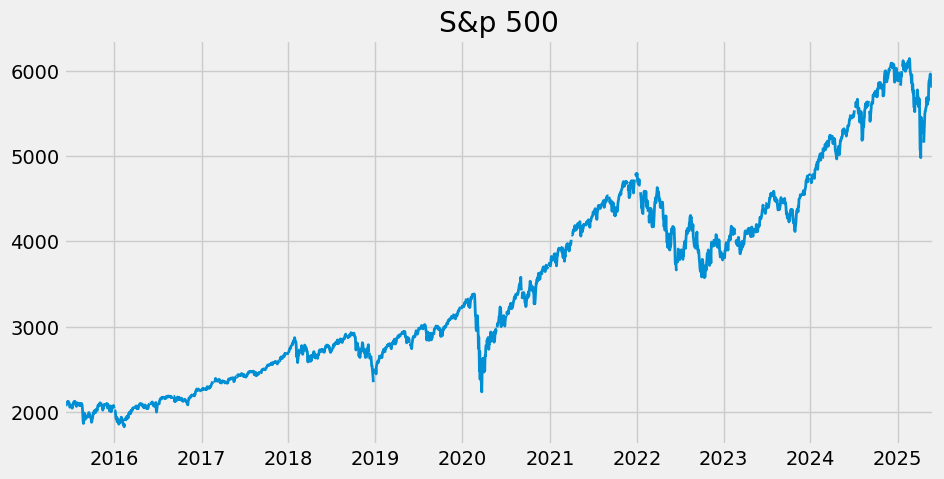

In [7]:
sp500 = fred.get_series(series_id ='SP500')
sp500.plot(figsize=(10,5), title='S&p 500', lw =2)

In [8]:
#3. Pull raw data

In [9]:
#4. Pull and Join multiple Data series

In [10]:
unemp_df = fred.search('unemployment state', filter=('frequency','Monthly'))
unemp_df = unemp_df.query("seasonal_adjustment=='Seasonally Adjusted' and units == 'Percent'")
unemp_df = unemp_df.loc[unemp_df['title'].str.contains('Unemployment Rate in')]

In [11]:
all_results =[]
for myid in unemp_df.index:
    results = fred.get_series(myid)
    results = results.to_frame(name = myid)
    all_results.append(results)
unemp_results = pd.concat(all_results, axis =1)

In [12]:
unemp_states = unemp_results.dropna()

In [13]:
id_to_state = unemp_df['title'].str.replace('Unemployment Rate in','').to_dict()
unemp_states.columns = [id_to_state[c] for c in unemp_states.columns]

In [14]:
# plot states unemploymnet rate

In [15]:
import plotly.io as pio
pio.renderers.default = "notebook_connected" 
fig = px.line(unemp_states, width =1000, height =600)
fig.show()

In [16]:
##pull april 2020 unemployment rate per state

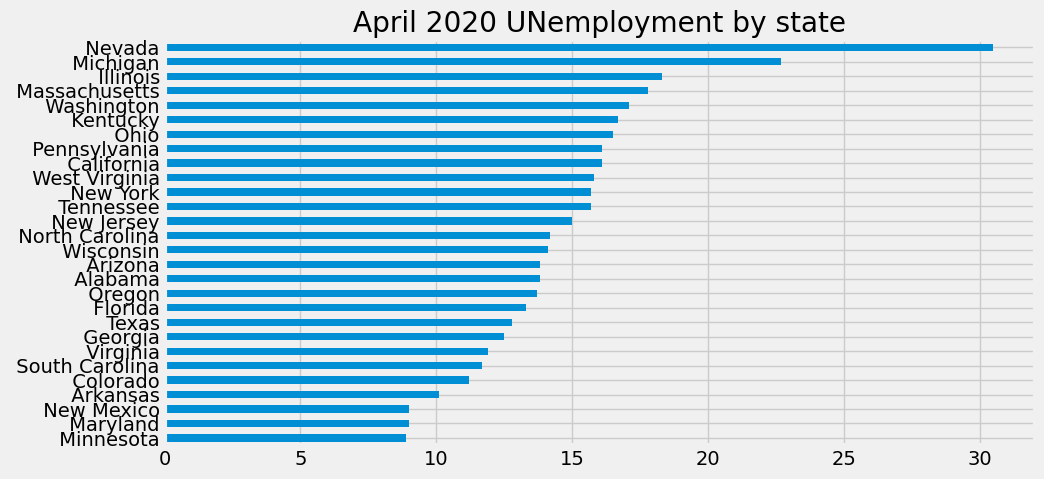

In [17]:
ax= unemp_states.loc[unemp_states.index =='2020-04-01'].T\
    .sort_values('2020-04-01').plot(kind='barh', figsize=(10,5), width=0.5 ,
                                    title = 'April 2020 Unemployment by state')
ax.legend().remove()
plt.show()

In [18]:
#Full participation rate

In [19]:
part_df = fred.search('participation rate state', filter=('frequency','Monthly'))
part_df = part_df.query("seasonal_adjustment=='Seasonally Adjusted' and units == 'Percent'")
part_df = part_df.loc[part_df['title'].str.contains('Labor Force Participation Rate for')]

In [20]:
part_id_to_state = part_df['title'].str.replace('Labor Force Participation Rate for','').to_dict()
part_results = []
for myid in part_df.index:
    results = fred.get_series(myid)
    results = results.to_frame(name = myid)
    part_results.append(results)
part_states = pd.concat(part_results, axis =1)
part_states.columns = [part_id_to_state[c] for c in part_states.columns]

In [21]:
px.line(part_states)

In [22]:
#Plot Unemployment vs Participation for New York

In [23]:
common_cols = set(unemp_states.columns) & set(part_states.columns)
common_cols

{' Alabama',
 ' Arizona',
 ' Arkansas',
 ' California',
 ' Colorado',
 ' Florida',
 ' Georgia',
 ' Illinois',
 ' Kentucky',
 ' Maryland',
 ' Massachusetts',
 ' Michigan',
 ' Minnesota',
 ' Nevada',
 ' New Jersey',
 ' New Mexico',
 ' New York',
 ' North Carolina',
 ' Ohio',
 ' Oregon',
 ' Pennsylvania',
 ' South Carolina',
 ' Tennessee',
 ' Texas',
 ' Virginia',
 ' Washington',
 ' West Virginia',
 ' Wisconsin'}

Text(0.5, 1.0, 'New York')

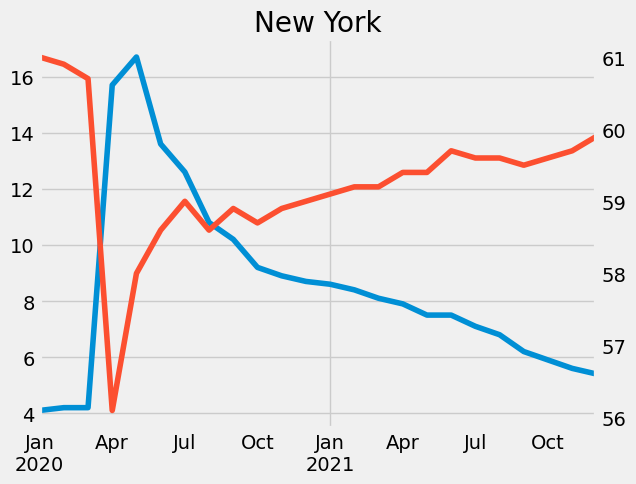

In [24]:
fig,ax = plt.subplots()
ax2 = ax.twinx()
unemp_states.query('index>=2020 and index<2022')[' New York'] \
    .plot(ax=ax,label ='Unemployment')   
part_states.query('index>=2020 and index<2022')[' New York'] \
    .plot(ax=ax2,label ='Participation', color = color_pal[1])
ax2.grid(False)
ax.set_title('New York')

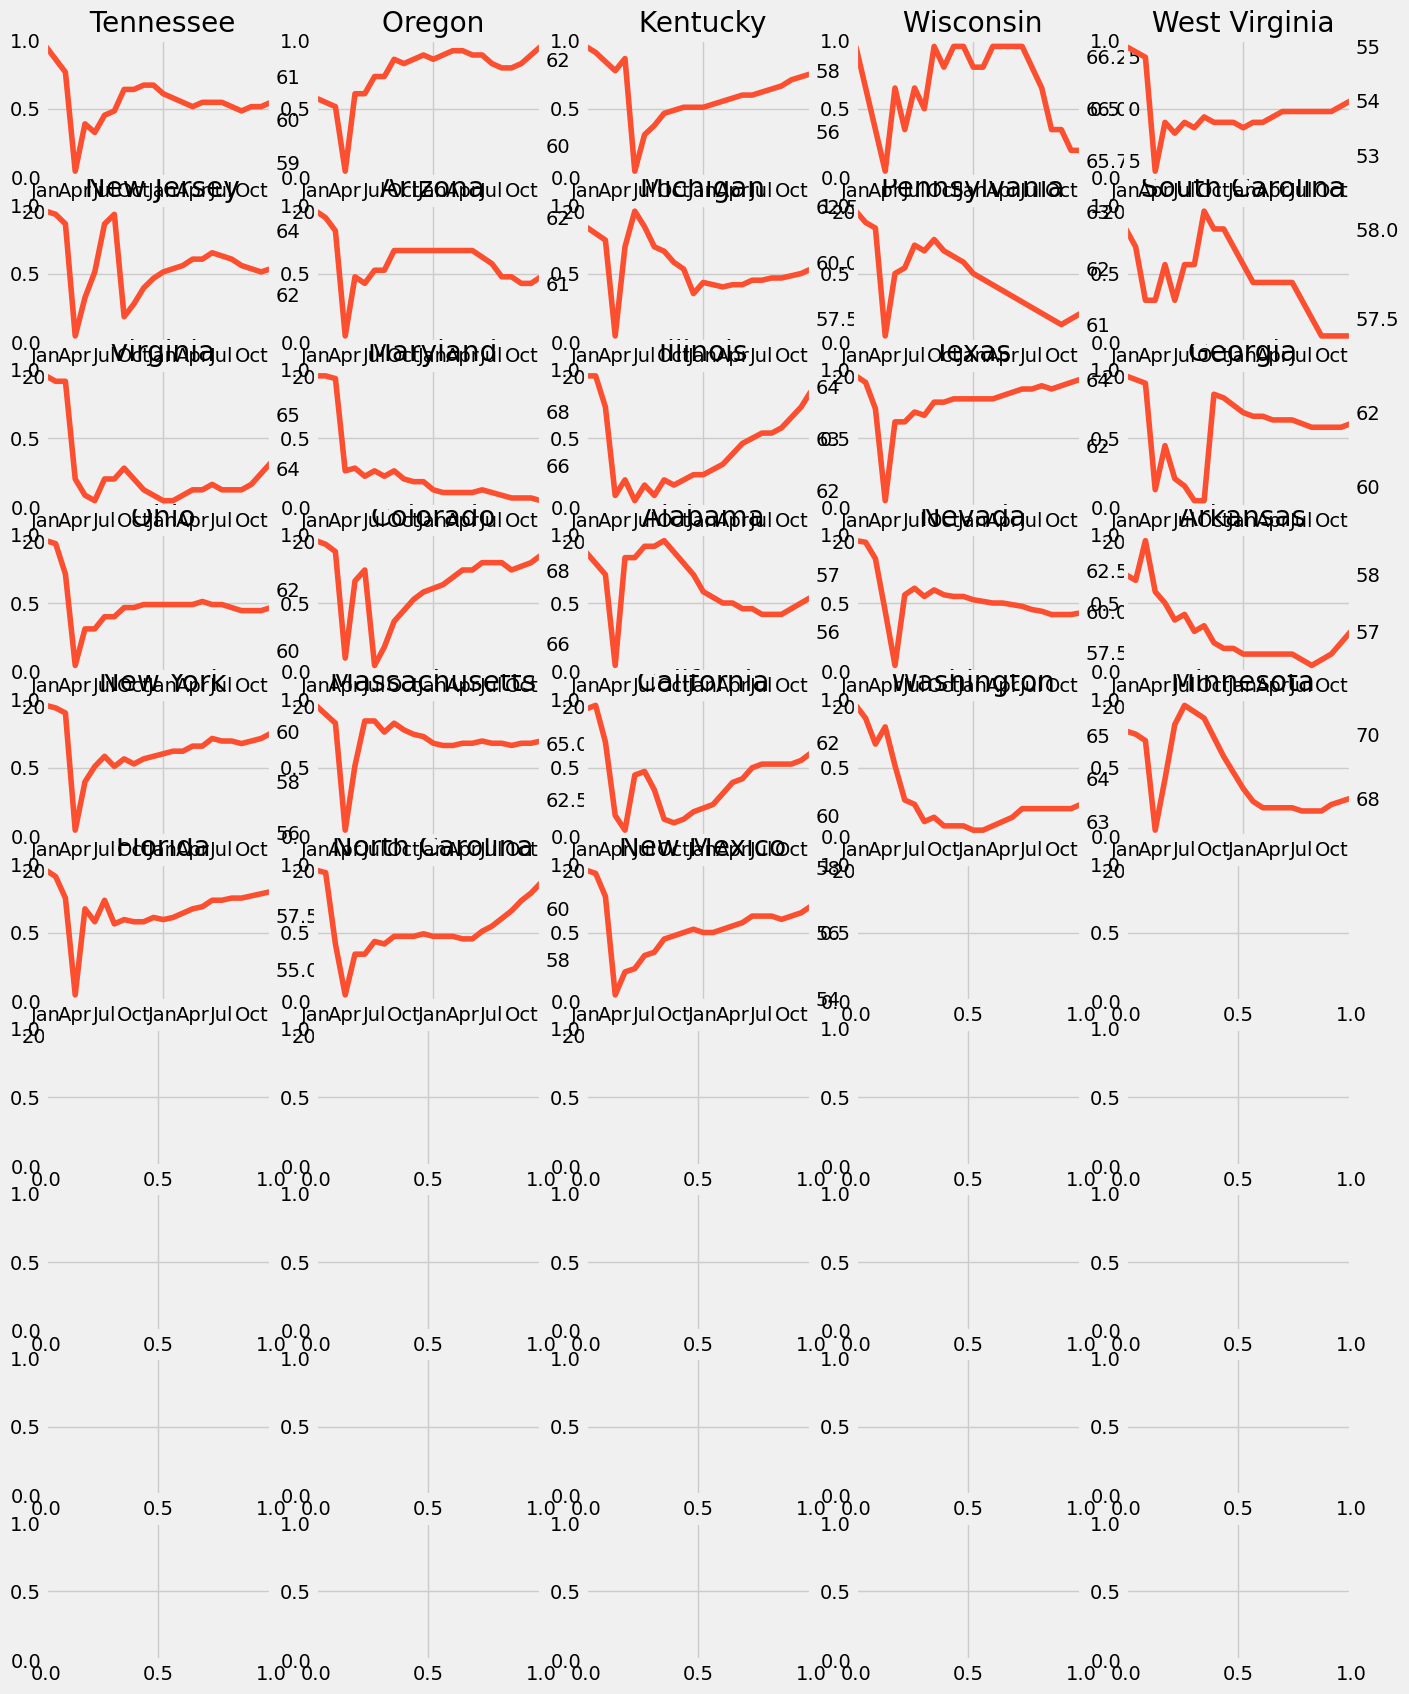

In [26]:
fig,axs = plt.subplots(10,5, figsize=(15,20))
axs = axs.flatten()
i=0
for state in common_cols:
    if i>=len(axs):
        break
    ax2 =axs[i].twinx()
    unemp_states.query('index>=2020 and index<2022')[state] \
        .plot(ax=ax,label ='Unemployment')   
    part_states.query('index>=2020 and index<2022')[state] \
        .plot(ax=ax2,label ='Participation', color = color_pal[1])
    ax2.grid(False)
    axs[i].set_title(state)
    i+=1
plt.show()